In [1]:
from math import pi
from math import sin

import matplotlib.pyplot as plt

import numpy as np

import math

def corr_vars( start=-10, stop=10, step=0.5, mu=0, sigma=3, func=lambda x: x ):
    x = np.arange(start, stop, step)    
    
    e = np.random.normal(mu, sigma, x.size)
    
    y = np.zeros(x.size)
    
    for ind in range(x.size):
        y[ind] = func(x[ind]) + e[ind]
    
    return (x,y)

In [2]:
np.random.seed(100)

#(x1,x2) = corr_vars(start=2, stop=4, step=0.2, sigma=2, func=lambda x: 2*math.sin(x)+x*x)
(x1,x2) = corr_vars(start=2, stop=4, step=0.2, sigma=2, func=lambda x: 2*math.sin(x))

A = np.column_stack((x1,x2))

In [3]:
A

array([[ 2.        , -1.68093609],
       [ 2.2       ,  2.30235361],
       [ 2.4       ,  3.65699797],
       [ 2.6       ,  0.52613067],
       [ 2.8       ,  2.63261787],
       [ 3.        ,  1.3106777 ],
       [ 3.2       ,  0.32561105],
       [ 3.4       , -2.65116887],
       [ 3.6       , -1.26403255],
       [ 3.8       , -0.71371289]])

(-4.0, 4.0)

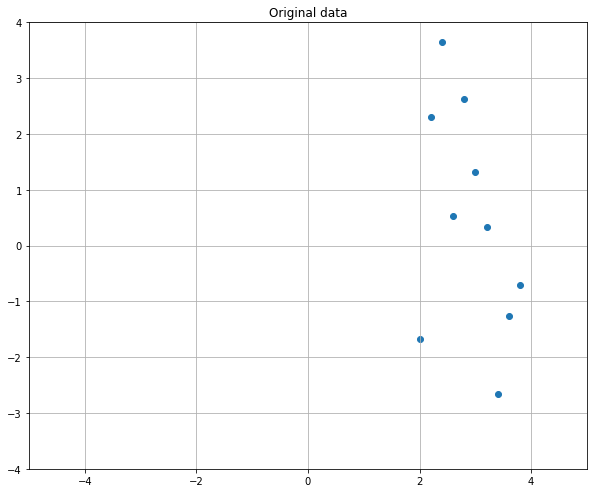

In [4]:
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Original data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])

In [5]:
A = (A-np.mean(A,axis=0))

In [6]:
A

array([[-0.9       , -2.12538994],
       [-0.7       ,  1.85789977],
       [-0.5       ,  3.21254412],
       [-0.3       ,  0.08167682],
       [-0.1       ,  2.18816403],
       [ 0.1       ,  0.86622385],
       [ 0.3       , -0.1188428 ],
       [ 0.5       , -3.09562271],
       [ 0.7       , -1.7084864 ],
       [ 0.9       , -1.15816674]])

(-4.0, 4.0)

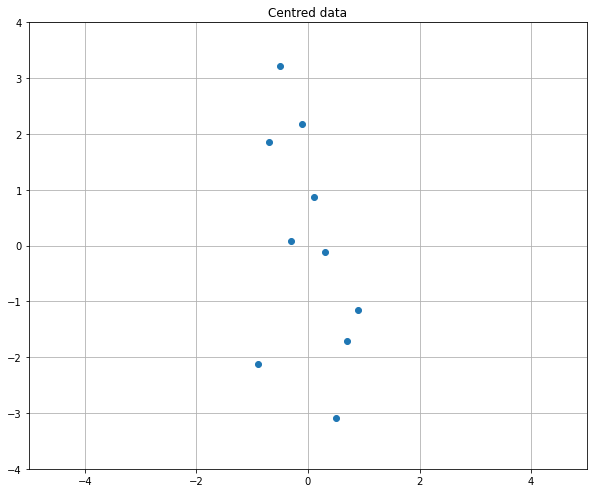

In [7]:
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Centred data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])

In [8]:
evecs, eigenvalues, V = np.linalg.svd(A.T, full_matrices=False)

In [9]:
evecs

array([[-0.14027773,  0.9901122 ],
       [ 0.9901122 ,  0.14027773]])

In [10]:
eigenvalues

array([6.19647908, 1.61106079])

In [11]:
x = []
y = []
for i in range (-4,4):
    x.append(i)
    y.append(evecs[1,1] * i / evecs[0,1])    


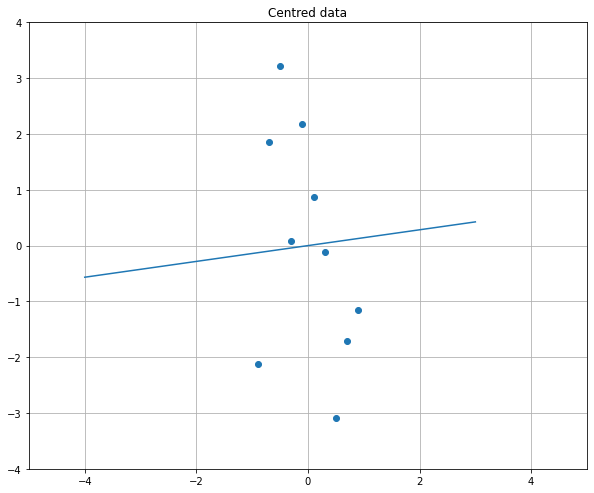

In [12]:
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Centred data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])
ax.plot(x, y, linestyle='-')

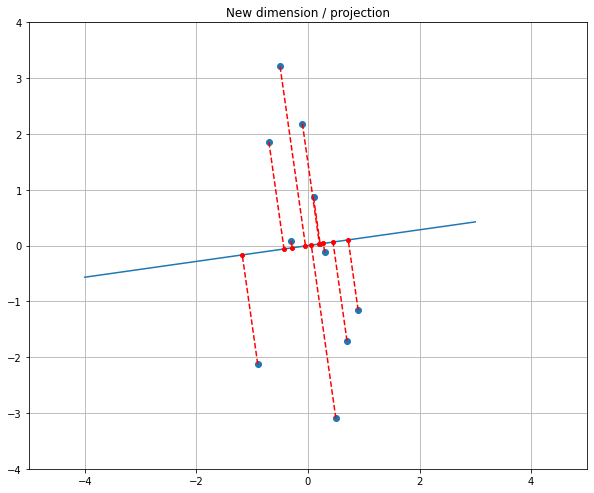

In [14]:
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("New dimension / projection")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])
ax.plot(x, y, linestyle='-')

p0 = [x[0],y[0]]
p1 = [x[len(x)-1],y[len(x)-1]]

a = np.array([[p1[0]-p0[0], p1[1]-p0[1]],
              [p0[1]-p1[1], p1[0]-p0[0]]])

for i in range(0, len(A)):
    q  = A[i]    
    
    b = -np.array([-q[0]*(p1[0]-p0[0]) - q[1]*(p1[1]-p0[1]),
                   -p0[1]*(p1[0]-p0[0])+ p0[0]*(p1[1]-p0[1])])

    proj = np.linalg.solve(a,b)
    
    ax.plot(proj[0],proj[1], 'bo', markersize=4, color='red')
    ax.plot((q[0],proj[0]),(q[1],proj[1]), linestyle='--', color='red')     